In [1]:
import pandas as pd

In [3]:
data = pd.read_csv('fraud_detection_dataset.csv')
df = data
df.head()

,Transaction_ID,Customer_Age,Gender,Income_Category,Transaction_Amount,Transaction_Type,Merchant_Type,Previous_Transactions,Fraudulent
0,TXN1,56,Male,High,1404.17,In-store,Clothing,35,0
1,TXN2,69,Female,High,1470.99,Online,Entertainment,2,0
2,TXN3,46,Female,Very High,1747.85,In-store,Electronics,9,0
3,TXN4,32,Male,Very High,2887.61,Online,Clothing,21,0
4,TXN5,60,Male,Medium,4155.21,Online,Entertainment,31,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Transaction_ID         50000 non-null  object 
 1   Customer_Age           50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Income_Category        50000 non-null  object 
 4   Transaction_Amount     50000 non-null  float64
 5   Transaction_Type       50000 non-null  object 
 6   Merchant_Type          50000 non-null  object 
 7   Previous_Transactions  50000 non-null  int64  
 8   Fraudulent             50000 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.4+ MB


In [5]:
df.isnull().sum()

,0
Transaction_ID,0
Customer_Age,0
Gender,0
Income_Category,0
Transaction_Amount,0
Transaction_Type,0
Merchant_Type,0
Previous_Transactions,0
Fraudulent,0


In [6]:
# Object type data :- Gender, Income_Category, Transaction_Type, Merchant_Type

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['Gender'] = LE.fit_transform(df['Gender'])
df['Income_Category'] = LE.fit_transform(df['Income_Category'])
df['Transaction_Type'] = LE.fit_transform(df['Transaction_Type'])
df['Merchant_Type'] = LE.fit_transform(df['Merchant_Type'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Transaction_ID         50000 non-null  object 
 1   Customer_Age           50000 non-null  int64  
 2   Gender                 50000 non-null  int64  
 3   Income_Category        50000 non-null  int64  
 4   Transaction_Amount     50000 non-null  float64
 5   Transaction_Type       50000 non-null  int64  
 6   Merchant_Type          50000 non-null  int64  
 7   Previous_Transactions  50000 non-null  int64  
 8   Fraudulent             50000 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 3.4+ MB


In [7]:
df.drop('Transaction_ID', axis=1, inplace=True)
df.head()

,Customer_Age,Gender,Income_Category,Transaction_Amount,Transaction_Type,Merchant_Type,Previous_Transactions,Fraudulent
0,56,1,0,1404.17,0,0,35,0
1,69,0,0,1470.99,1,2,2,0
2,46,0,3,1747.85,0,1,9,0
3,32,1,3,2887.61,1,0,21,0
4,60,1,2,4155.21,1,2,31,0


In [10]:
from sklearn.preprocessing import Normalizer
Nor = Normalizer()

df['Transaction_Amount'] = Nor.fit_transform(df['Transaction_Amount'].values.reshape(-1, 1))
df

,Customer_Age,Gender,Income_Category,Transaction_Amount,Transaction_Type,Merchant_Type,Previous_Transactions,Fraudulent
0,56,1,0,-1.0,0,0,35,0
1,69,0,0,-1.0,1,2,2,0
2,46,0,3,-1.0,0,1,9,0
3,32,1,3,1.0,1,0,21,0
4,60,1,2,1.0,1,2,31,0
...,...,...,...,...,...,...,...,...
49995,66,1,3,1.0,1,0,49,0
49996,35,0,2,1.0,0,1,33,0
49997,28,1,2,1.0,1,4,5,0
49998,59,0,0,-1.0,0,3,23,0


In [22]:
corr_matrix = df.corr()
corr_matrix['Fraudulent'].sort_values(ascending=False)

,Fraudulent
Fraudulent,1.000000
Gender,0.002072
Transaction_Amount,0.001971
Customer_Age,0.001443
Income_Category,-0.000985
Previous_Transactions,-0.001973
Merchant_Type,-0.002219
Transaction_Type,-0.007323


In [14]:
df['Fraudulent'].value_counts()

,count
Fraudulent,
0,48512
1,1488


In [16]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

X = df.drop('Fraudulent', axis=1)
y = df['Fraudulent']

X_smote, y_smote = smote.fit_resample(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [18]:
y_smote.value_counts()

,count
Fraudulent,
0,48512
1,48512


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

In [20]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.6412780211285751
[[6116 3657]
 [3304 6328]]
              precision    recall  f1-score   support

           0       0.65      0.63      0.64      9773
           1       0.63      0.66      0.65      9632

    accuracy                           0.64     19405
   macro avg       0.64      0.64      0.64     19405
weighted avg       0.64      0.64      0.64     19405



<function matplotlib.pyplot.show(close=None, block=None)>

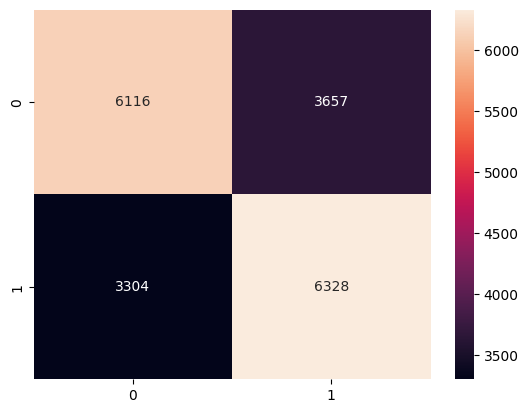

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show